# Teaching A Machine To Add

#### Introduction: 
In this project, I am examining a few machine learning models. With each of these models, I am asking the following questions: 
* How well will this model predict the addition of 2 numbers? 
* What if it were given imperfect data?
* How would more data relate to predictive ability?
    
The purpose of this study is to get a better understanding of how each of these models behave. 

#### Rules For This Experiment: 
1. No feature engineering or excluding outliers. Otherwise, the problem is solved before the machine learning model starts.
2. Default settings only. For the neural network, there is no default setting per se, so I've tried to keep things simple.

#### Summary of Results:
* Linear regression worked very well as was expected.
* There were very interesting patterns created by the predictions of some of the models. This is related to the randomised input data for model training.
* The neural network worked very well, but ended up getting wider layers than I expected. I also found that dropout layers didn't improve performance. Most surprisingly, the neural network trained extremely quickly.
* Completely unsurprisingly, classifiers are not as good at adding.

#### Other Notes:
* Sorry for all of the naked Excepts **¯\\\_(ツ)\_/¯**

# Import Libraries

In [2]:
import random
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Classes to Generate Training and Test Data

In [3]:
class AddMe(list):
    '''
    makes a list of length list_size with x1, x2, and y
    sometimes y is random, but math_accuracy of the time y = x1 + x2
    this is an added list, along with some errors / noise 
    other notes:
    inherits from list 
    lists of lists works as a data structure for sklearn
    '''

    def __init__(self, list_size, math_accuracy):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.math_accuracy = math_accuracy
        self.list_initialise(self.list_size, self.math_accuracy)
    
    def __str__(self):
        return f"{self.list_size} training numbers at {self.math_accuracy:.0%} accuracy"

    def list_initialise(self, list_size, math_accuracy):
        for i in range(list_size):
            # initialise x and y values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            
            # set y to be the addition of x1 and x2
            y = x1 + x2
            
            # set y to a random value if math_accuracy is exceeded
            if i / list_size >= math_accuracy:
                while y == x1 + x2:
                    # rand num * 2 so that plot and rand share the same domain
                    y = random.randint(self.MIN_NUM * 2, self.MAX_MUM * 2)
            
            self.append([x1, x2, y])

        # sort finished list so errors are not clustered
        self.sort()


class TestMe(list):
    '''
    makes a list of length list_size with random x1, x2
    to be used for testing
    '''

    def __init__(self, list_size):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.list_initialise(self.list_size)

    def __str__(self):
        return f"{self.list_size} test numbers"

    def list_initialise(self, list_size):
        for i in range(list_size):
            # initialise x values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            self.append([x1, x2])
        

In [4]:
# Initialise Training Sets
# small, medium, and large, between 50% and 100% accuracy

small_100 = AddMe(100, 1)
small_99 = AddMe(100, 0.99)
small_90 = AddMe(100, 0.9)
small_75 = AddMe(100, 0.75)
small_50 = AddMe(100, 0.5)

medium_100 = AddMe(1000, 1)
medium_99 = AddMe(1000, 0.99)
medium_90 = AddMe(1000, 0.9)
medium_75 = AddMe(1000, 0.75)
medium_50 = AddMe(1000, 0.5)

large_100 = AddMe(10000, 1)
large_99 = AddMe(10000, 0.99)
large_90 = AddMe(10000, 0.9)
large_75 = AddMe(10000, 0.75)
large_50 = AddMe(10000, 0.5)


# Check Math Function

In [5]:
def check_math(inputlist):
    '''
    takes in list of list, x1, x2, and y
    returns number of rows, # times y = x1 + x2, # times y ~ x1 + x2, and mean square error
    ie, (rows, correct_when_rounded, correct, MSE)
    '''

    rows = 0
    correct_when_rounded = 0
    correct = 0
    MSE = 0

    for x in inputlist:
        rows += 1

        # correct_when_rounded needs to slice into np.array() for tensorflow        
        try:
            if round(x[0] + x[1]) == round(x[2]):
                correct_when_rounded += 1
        except:
            if round(x[0] + x[1]) == round(x[2][0]):
                correct_when_rounded += 1

        if x[0] + x[1] == x[2]:
            correct += 1
        else:
            MSE += (x[2] - (x[0] + x[1])) ** 2

    MSE = MSE / rows
    
    return rows, correct_when_rounded, correct, MSE


# Import and Initialise ML Models

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# initialise all models
# just use default parameters
# tuning is likely to improve any of these models

# decision tree
dt_model = DecisionTreeClassifier()

# # naive Bayes
nb_model = GaussianNB()

# linear regression
lr_model = LinearRegression()

# random forest
rf_model = RandomForestClassifier()

# xgboost
xgb_model = XGBRegressor()

# tensor flow (not "default", but only moderate tuning)
tf_width = 256  # lower values perform poorly
tf_dropout = 0  # seems to perform negatively in most cases
tf_model = Sequential()
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(1))
tf_model.compile(optimizer="rmsprop", loss="mse")

# Lists of Models and Training Sets

In [7]:
# set up lists of models / sets

list_of_models = [dt_model, nb_model, lr_model, rf_model, xgb_model, tf_model]

training_sets = [small_100, small_99, small_90, small_75, small_50, 
                 medium_100, medium_99, medium_90, medium_75, medium_50, 
                 large_100, large_99, large_90, large_75, large_50]


# Functions: Train, Predict

In [8]:
def train_model(model, training_set):
    # split into X and y
    ind_var = [sublist[:2] for sublist in training_set]  # x1 and x2
    dep_var = [sublist[2] for sublist in training_set]  # y

    # fit to training set (np.array() for XGBoost)
    try:
        # verbose=0 for tensorflow
        model.fit(np.array(ind_var), np.array(dep_var), verbose=0)
    except:
        model.fit(np.array(ind_var), np.array(dep_var))
        
    return model


def predict_model(model, test_set):
    # uses np.array() for XGBoost
    try:
        # verbose=0 for tensorflow
        return model.predict(np.array(test_set), verbose=0)
    except:
        return model.predict(np.array(test_set))


def get_name_of_model(model):
    model_text = str(model).split("(")[0]
    if model_text[0] == "<":
        model_text = "Keras.TensorFlow"

    return model_text


# Train all models on all training sets and output prediction summary from check_math()

In [9]:
def fit_model_to_data(model, list_of_training_sets, n_tests):
    '''
    Takes in the ML model, a list of training sets, and the number of
    tests to perform. Checks math using check_math() from above.
    Uses np.array() to match input requirements for XGBoost; lists
    of lists work for sklearn models.
    '''
    
    # These are likely the same as the min and max above
    # but they don't need to be. Maybe try testing extreme values.
    MIN_TEST = -100
    MAX_TEST = 100

    # initialise an empty list 
    results = []

    for training_set in list_of_training_sets:

        # fit model
        fit_model = train_model(model, training_set)

        # test model
        test_set = TestMe(n_tests)
        predictions = predict_model(model, test_set)
        test_list = np.column_stack((test_set, predictions))
        
        # test predictions with check_math(inputlist)
        results.append(check_math(test_list))

    return results


In [10]:
%%time
n_model = 0
n_tests = 1000

dt_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(dt_results))

DecisionTreeClassifier
       0    1    2     3
0   1000   14   14   453
1   1000   20   20  1213
2   1000   24   24  2363
3   1000   21   21  4407
4   1000    7    7 12972
5   1000   66   66    49
6   1000   88   88   128
7   1000   71   71  3081
8   1000   55   55  5226
9   1000   40   40  9540
10  1000  263  263     4
11  1000  278  278   312
12  1000  246  246  1821
13  1000  228  228  5098
14  1000  139  139  9891
Wall time: 678 ms


In [11]:
%%time
n_model = 1
n_tests = 1000

nb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(nb_results))

GaussianNB
       0   1   2     3
0   1000  18  18  1070
1   1000  13  13  3171
2   1000  14  14  2727
3   1000   8   8  3030
4   1000   7   7 12843
5   1000  32  32   249
6   1000  29  29   292
7   1000  26  26   335
8   1000  30  30  2202
9   1000  21  21  4738
10  1000  23  23   500
11  1000  26  26   476
12  1000  17  17   565
13  1000  16  16   524
14  1000  18  18   703
Wall time: 554 ms


In [12]:
%%time
n_model = 2
n_tests = 1000

lr_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(lr_results))

LinearRegression
       0     1    2    3
0   1000  1000   52    0
1   1000   118    0   10
2   1000    31    0  103
3   1000    19    0  695
4   1000    11    0 1592
5   1000  1000  125    0
6   1000   307    0    1
7   1000    41    0   59
8   1000    13    0  551
9   1000    10    0 1774
10  1000  1000   50    0
11  1000   357    0    1
12  1000    47    0   57
13  1000    11    0  445
14  1000    12    0 1614
Wall time: 404 ms


In [13]:
%%time
n_model = 3
n_tests = 1000

rf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(rf_results))

RandomForestClassifier
       0    1    2     3
0   1000   23   23   309
1   1000   31   31   642
2   1000   24   24  2044
3   1000   18   18  3732
4   1000   20   20 10400
5   1000   67   67    36
6   1000   74   74   245
7   1000   70   70  1666
8   1000   50   50  4950
9   1000   35   35  9930
10  1000  244  244     3
11  1000  217  217   117
12  1000  193  193  1553
13  1000  202  202  4839
14  1000  121  121  9353
Wall time: 34.7 s


In [14]:
%%time
n_model = 4
n_tests = 1000

xgb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(xgb_results))

XGBRegressor
       0    1  2    3
0   1000   30  0  144
1   1000   37  0  411
2   1000   24  0 1110
3   1000   20  0 2708
4   1000   11  0 8320
5   1000  155  0   12
6   1000  123  0   48
7   1000   50  0  932
8   1000   23  0 2464
9   1000   12  0 5431
10  1000  308  0    2
11  1000  184  0   63
12  1000   48  0  422
13  1000   26  0  901
14  1000   10  0 2326
Wall time: 2.1 s


In [15]:
%%time
n_model = 5
n_tests = 1000

tf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(tf_results))

Keras.TensorFlow
       0    1  2    3
0   1000   11  0  649
1   1000   19  0  332
2   1000  120  0   64
3   1000   10  0  617
4   1000   11  0 1449
5   1000  308  0    2
6   1000   24  0   77
7   1000   32  0  348
8   1000   15  0  314
9   1000   10  0 1826
10  1000  165  0  106
11  1000    3  0   84
12  1000   39  0  374
13  1000   28  0  419
14  1000   10  0 1194
Wall time: 4.65 s


# Summary of Model Performance vs Training Data Accuracy

In [16]:
list_of_results = [dt_results, nb_results, lr_results, rf_results, xgb_results, tf_results]

list_of_model_names = ['Decision Tree', 'Naive Bayes', 'Linear Regression', 
                       'Random Forest', 'XGBoost', 'Keras TensorFlow']

list_of_settings = [[100, 100], [100, 99], [100, 90], [100, 75], [100, 50], 
                    [1000, 100], [1000, 99], [1000, 90], [1000, 75], [1000, 50], 
                    [10000, 100], [10000, 99], [10000, 90], [10000, 75], [10000, 50]]

df_settings = pd.DataFrame(list_of_settings)
MSE_summary = pd.DataFrame()

for i, x in enumerate(list_of_results):
    name = list_of_model_names[i]
    x = pd.DataFrame(x)
        
    # generate a list of lists of "name" same length as x
    name_df = []
    for j in x[0]:
        name_df.append([name])
    name_df = pd.DataFrame(name_df)
        
    x = pd.concat([name_df, df_settings, x.iloc[:, 1], x.iloc[:, 3]], axis=1)
        
    MSE_summary = pd.concat([MSE_summary, x], axis=0)

MSE_summary.columns = ['Model', 'Size', 'Accuracy', 'Correct_per_1000', 'Mean_Squared_Error']
MSE_summary = MSE_summary.reset_index(drop=True)  # reset index for Seaborn

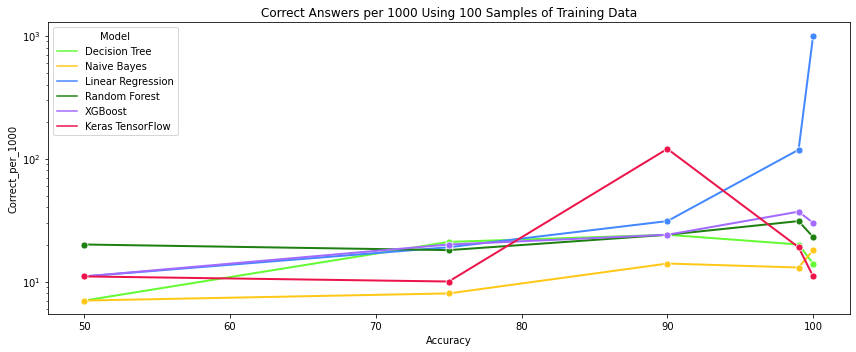

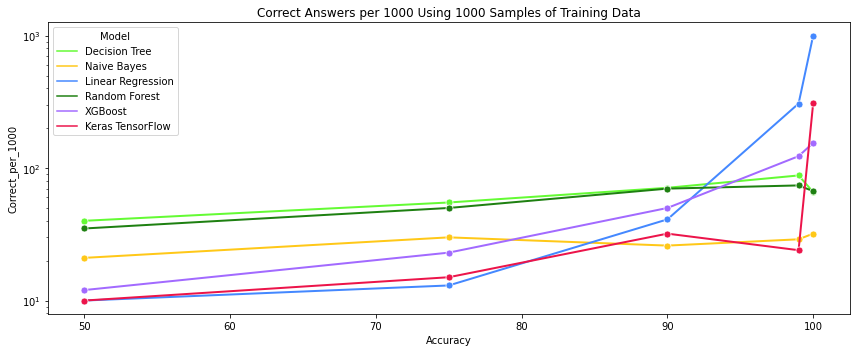

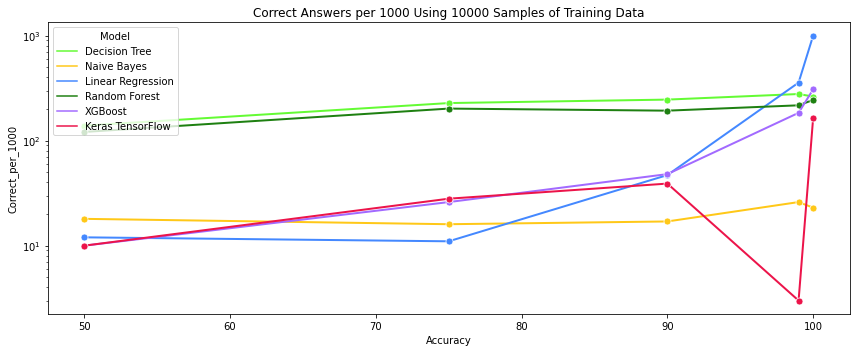

In [17]:
# Correct Answers per 1000 as a function of Training Data Accuracy

custom_palette = ['#64FB34', '#FFC818', '#4488FF', '#1E8011', '#A26AFF', '#EC144A']
figsize=(12,5)

title = "Correct Answers per 1000 Using {} Samples of Training Data"

sample_size = 100
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plot.set(yscale='log')
plt.title(title.format(sample_size))
plt.tight_layout()

sample_size = 1000
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plot.set(yscale='log')
plt.title(title.format(sample_size))
plt.tight_layout()

sample_size = 10000
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plot.set(yscale='log')
plt.title(title.format(sample_size))
plt.tight_layout()

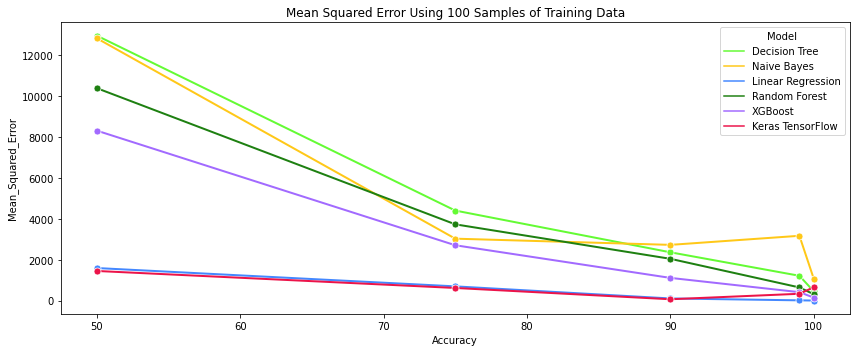

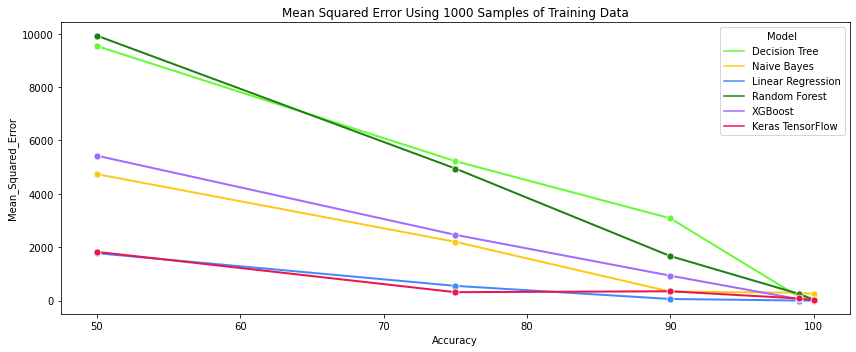

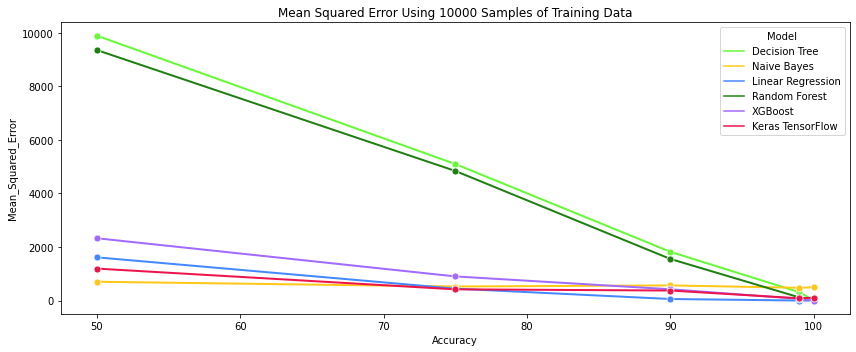

In [18]:
# Mean Squared Error as a function of Training Data Accuracy

title = "Mean Squared Error Using {} Samples of Training Data"

sample_size = 100
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plt.title(title.format(sample_size))
plt.tight_layout()

sample_size = 1000
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plt.title(title.format(sample_size))
plt.tight_layout()

sample_size = 10000
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plt.title(title.format(sample_size))
plt.tight_layout()


# Summary of Model Performance vs Training Data Set Size

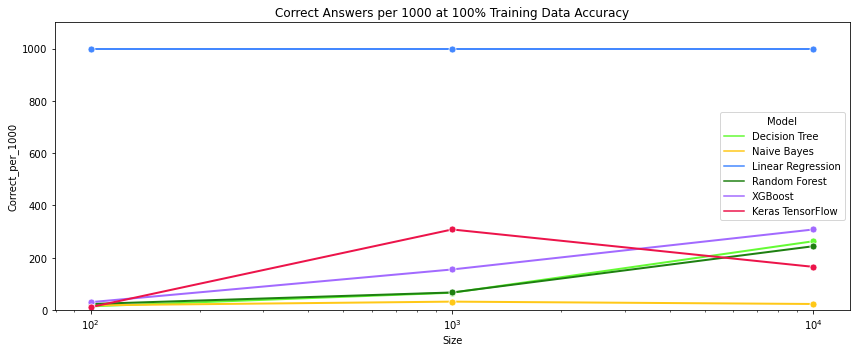

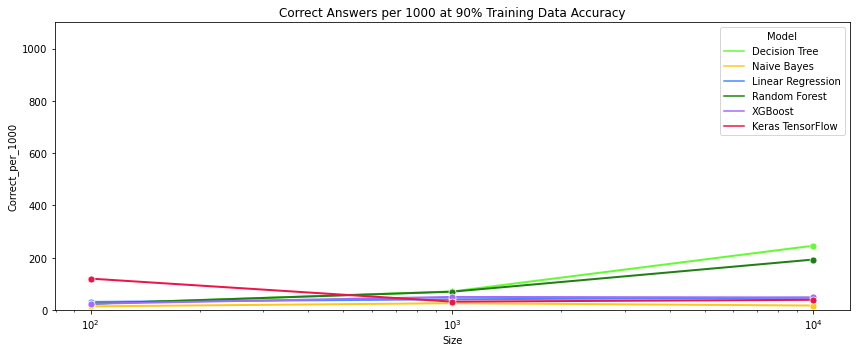

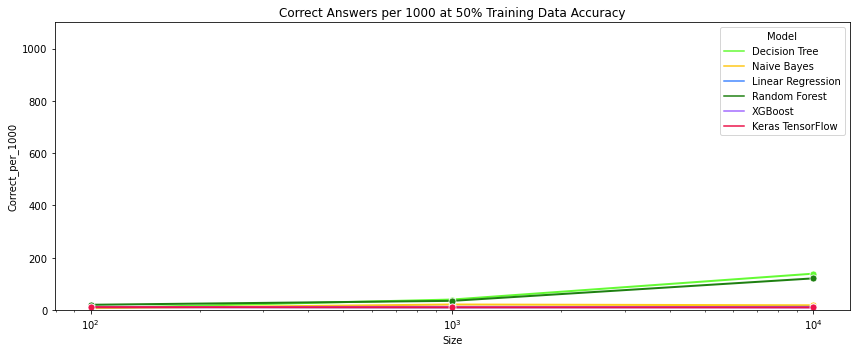

In [19]:
# Correct Answers per 1000 as a function of Training Data Size

ylim=(0, 1100)
title = "Correct Answers per 1000 at {}% Training Data Accuracy"

training_accuracy = 100
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy], x='Size', y='Correct_per_1000', 
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plot.set(ylim=ylim)
plot.set(xscale='log')
plt.title(title.format(training_accuracy))
plt.tight_layout()

training_accuracy = 90
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy], x='Size', y='Correct_per_1000', 
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plot.set(ylim=ylim)
plot.set(xscale='log')
plt.title(title.format(training_accuracy))
plt.tight_layout()

training_accuracy = 50
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy], x='Size', y='Correct_per_1000', 
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plot.set(ylim=ylim)
plot.set(xscale='log')
plt.title(title.format(training_accuracy))
plt.tight_layout()

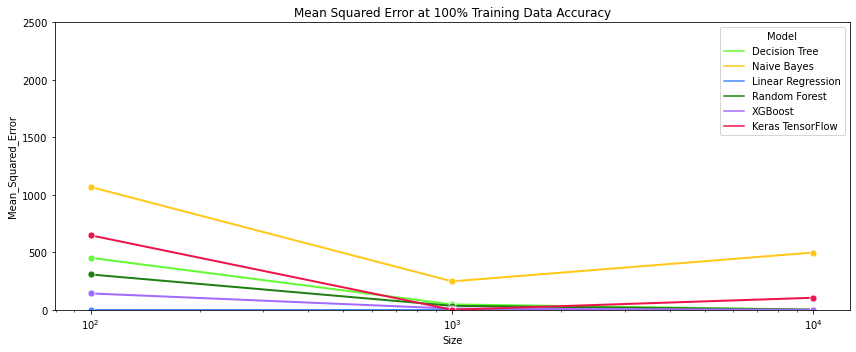

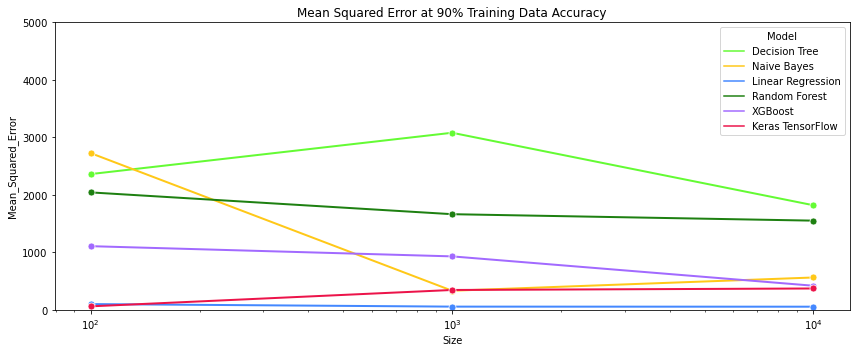

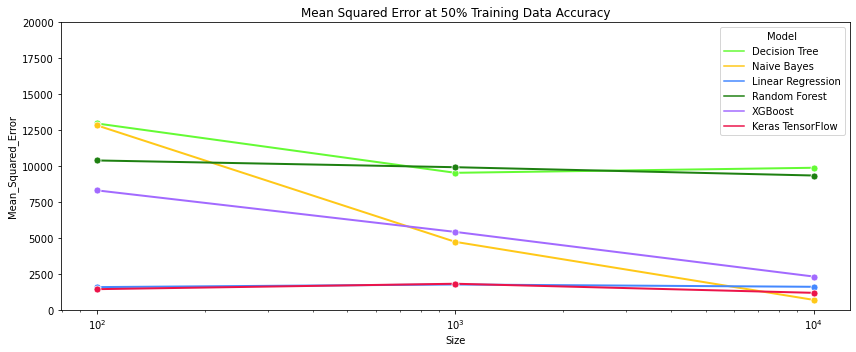

In [20]:
# Mean Squared Error as a Function of Training Data Size

title = "Mean Squared Error at {}% Training Data Accuracy"

training_accuracy = 100
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy], x='Size', y='Mean_Squared_Error', 
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plot.set(ylim=(0, 2500))
plot.set(xscale='log')
plt.title(title.format(training_accuracy))
plt.tight_layout()

training_accuracy = 90
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy], x='Size', y='Mean_Squared_Error', 
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plot.set(ylim=(0, 5000))
plot.set(xscale='log')
plt.title(title.format(training_accuracy))
plt.tight_layout()

training_accuracy = 50
plt.figure(figsize=figsize)
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy], x='Size', y='Mean_Squared_Error', 
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7);
plot.set(ylim=(0, 20000))
plot.set(xscale='log')
plt.title(title.format(training_accuracy))
plt.tight_layout()

# How Did I Do?
Checking predictions on individual sets of numbers.

In [21]:
# how did I do?

def how_did_i_do(model, a_test, b_test):
    try:  # tensorflow
        guess = predict_model(model, [[a_test, b_test]])[0][0]
    except:
        guess = predict_model(model, [[a_test, b_test]])[0]

    print(f"I am {get_name_of_model(model)}.\nI think that {a_test} + {b_test} = {guess:0.2f}\nHow did I do?")


In [22]:
def test_how_i_did(trainingset_n, model_n, a_test, b_test):
    current_training_set = training_sets[trainingset_n]
    current_train_model = list_of_models[model_n]
#     print(f"I was trained using {training_sets[trainingset_n]}.")
    how_did_i_do(train_model(current_train_model, current_training_set), a_test, b_test)
    print()
    

In [23]:
test_how_i_did(12, 5, 7, 6)

I am Keras.TensorFlow.
I think that 7 + 6 = 12.77
How did I do?



In [24]:
def how_did_all_models_do(test_set, a_test, b_test):
    current_training_set = training_sets[test_set]

    print(current_training_set, "\n")
    
    for i in range(len(list_of_models)):
        test_how_i_did(test_set, i, a_test, b_test)


In [25]:
how_did_all_models_do(10, 3, 4)

10000 training numbers at 100% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = 8.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = 39.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = 7.00
How did I do?

I am RandomForestClassifier.
I think that 3 + 4 = 9.00
How did I do?

I am XGBRegressor.
I think that 3 + 4 = 6.57
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 7.06
How did I do?



In [26]:
how_did_all_models_do(3, 3, 4)

100 training numbers at 75% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = 31.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = -25.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = 1.04
How did I do?

I am RandomForestClassifier.
I think that 3 + 4 = 31.00
How did I do?

I am XGBRegressor.
I think that 3 + 4 = 27.87
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 4.93
How did I do?



# Visualisation: Scatterplot of Training vs Prediction

In [27]:
def prediction_output(model, n_tests):
    test_set = TestMe(n_tests)
    y_predict = predict_model(model, test_set)
    return np.column_stack((test_set, y_predict))


In [28]:
def scatterplot_accuracy(dataset, **kwargs):
    '''
    plots predicted vs correct as a scatterplot
    test x1 + x2 = y, plot predictions vs y_actual
    '''

    # print(dataset)  # this only works with classes w __str__ (AddMe)

    correct_plot = [sublist[0] + sublist[1] for sublist in dataset]
    predict_plot = [sublist[2] for sublist in dataset]

    plt.figure(figsize=(10,4))
    sns.scatterplot(x=correct_plot, y=predict_plot, **kwargs)


In [29]:
def all_scatter_plots(trainingset_n, list_of_training_models, n_tests):
    current_training_set = training_sets[trainingset_n]
        
    # training set plot
    training_set_to_plot = current_training_set
    scatterplot_accuracy(training_set_to_plot, color=".5", s=20)
    plt.title(current_training_set)
    plt.xlabel('Correct Value')
    plt.ylabel('Provided Value')
    plt.tight_layout()

    # plot all tests
    for current_model in list_of_training_models:
        current_test_model = train_model(current_model, current_training_set)
        set_to_plot = prediction_output(current_test_model, n_tests)
        scatterplot_accuracy(set_to_plot, s=20)
        plt.title(get_name_of_model(current_model))
        plt.xlabel('Correct Value')
        plt.ylabel('Predicted Value')
        plt.tight_layout()

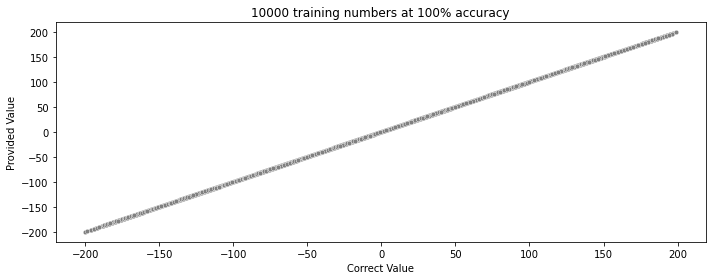

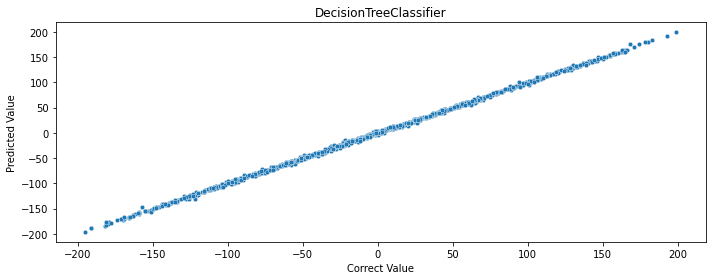

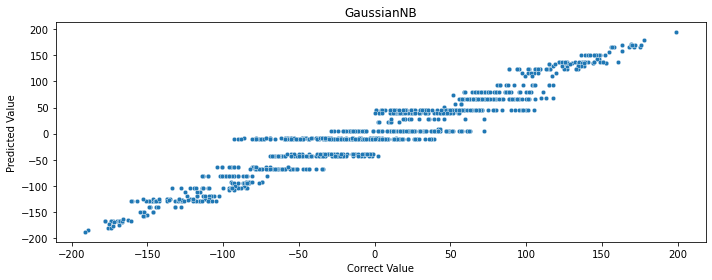

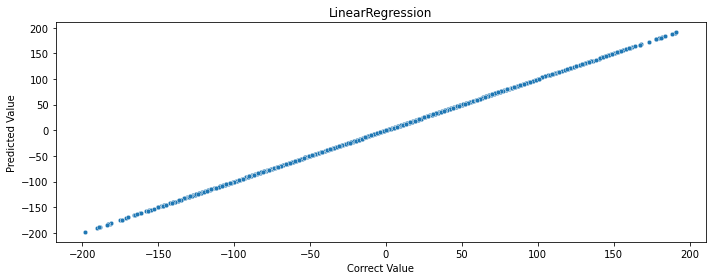

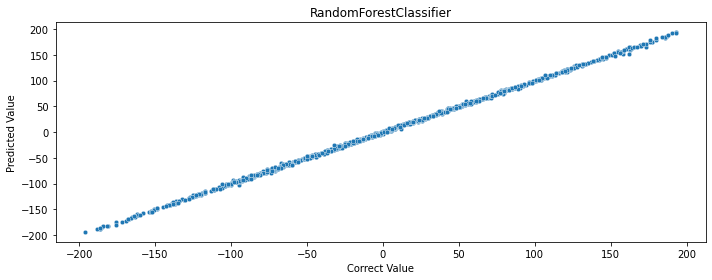

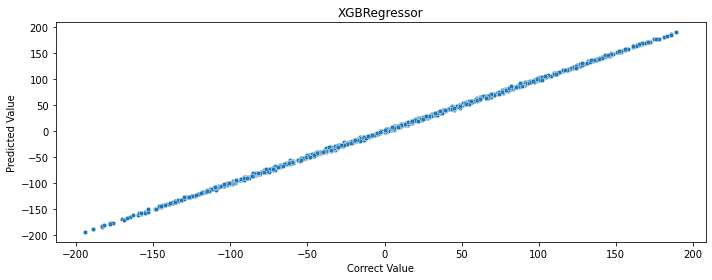

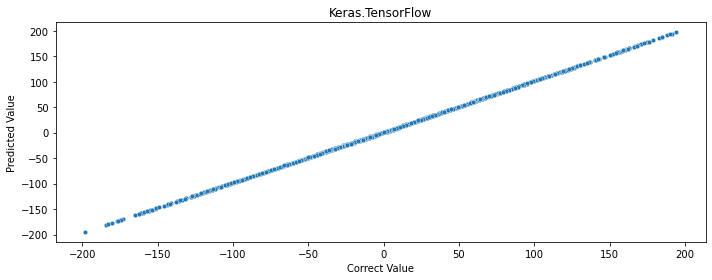

In [30]:
all_scatter_plots(10, list_of_models, 1000)

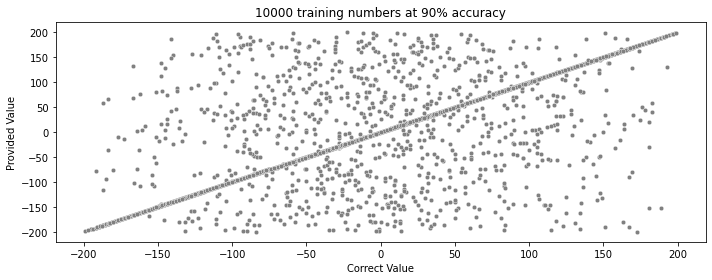

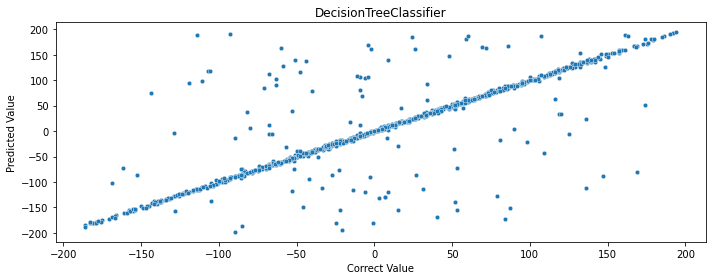

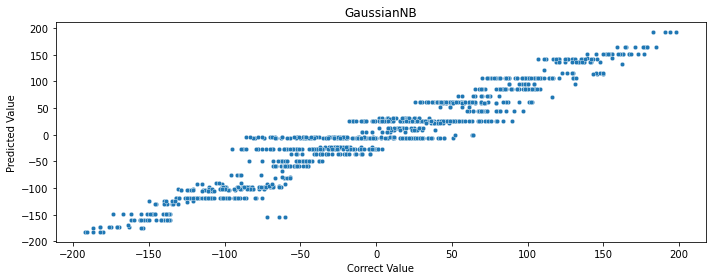

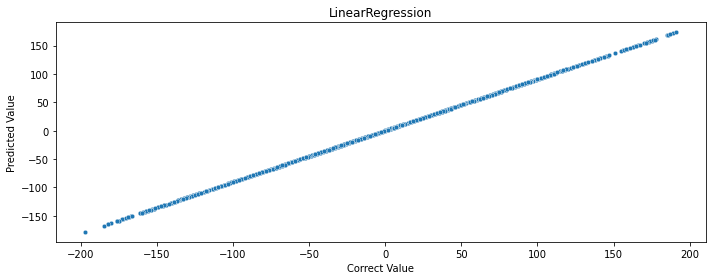

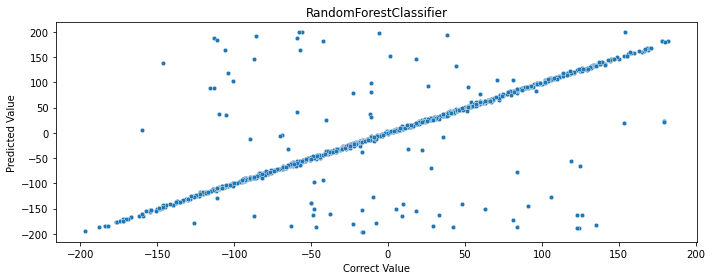

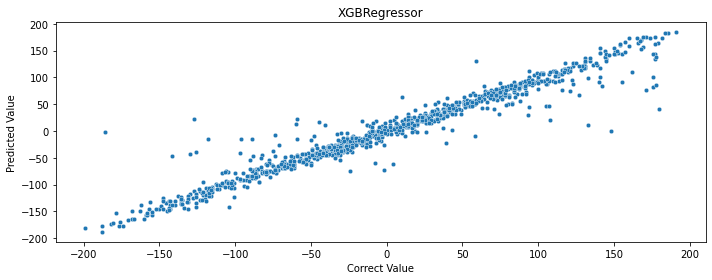

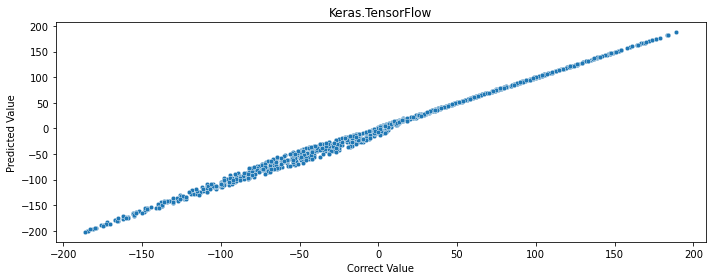

In [31]:
all_scatter_plots(12, list_of_models, 1000)

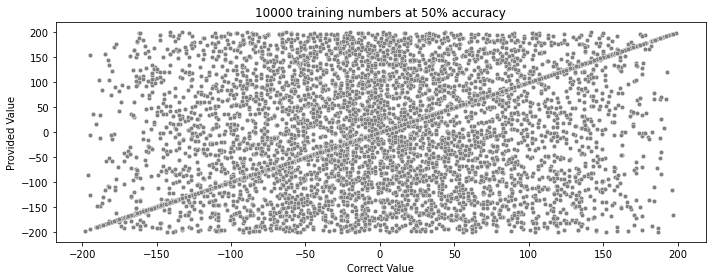

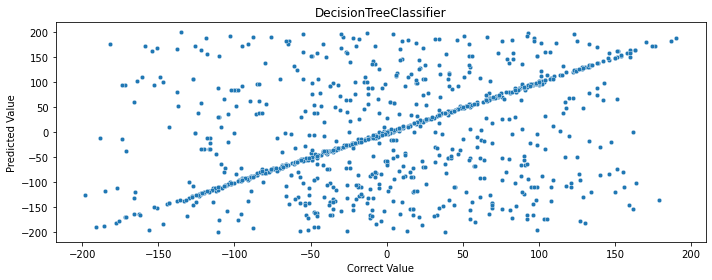

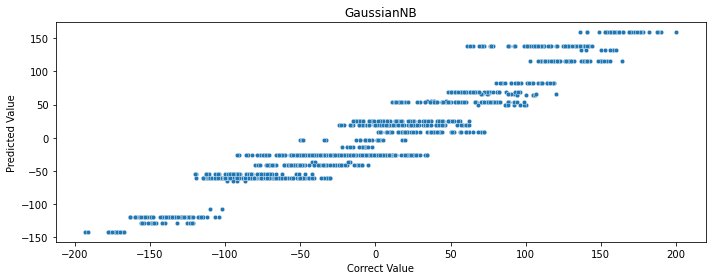

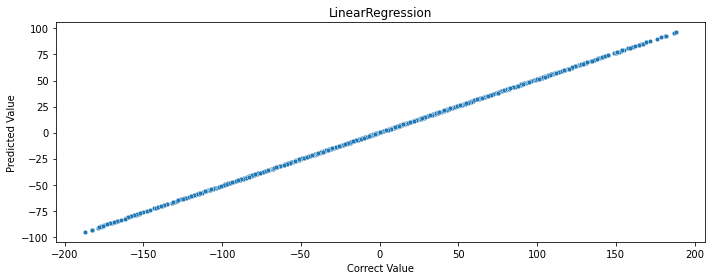

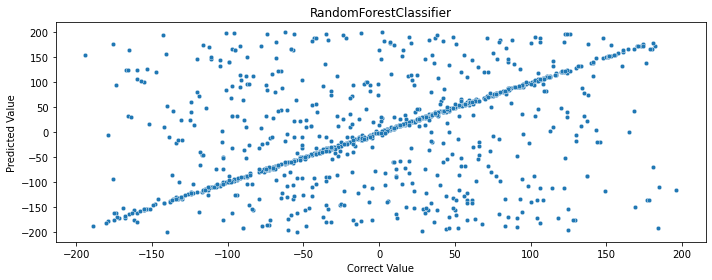

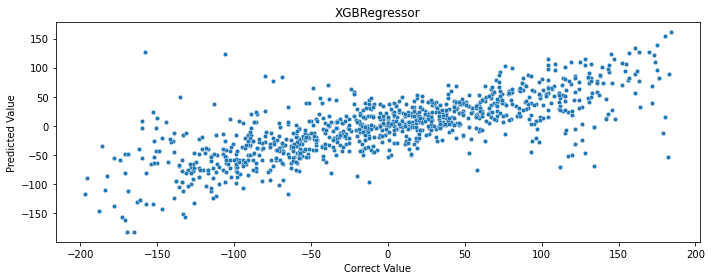

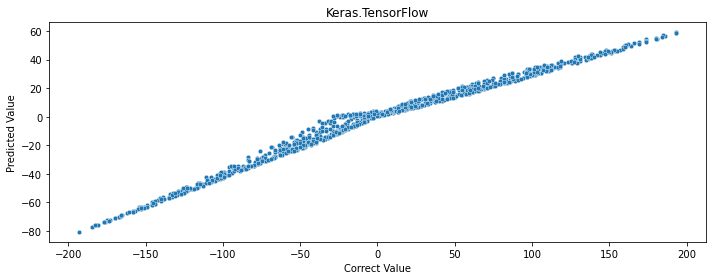

In [32]:
all_scatter_plots(14, list_of_models, 1000)

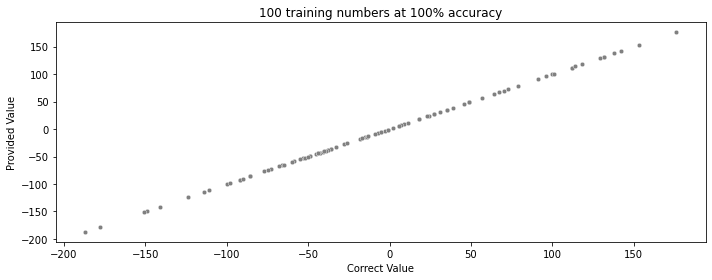

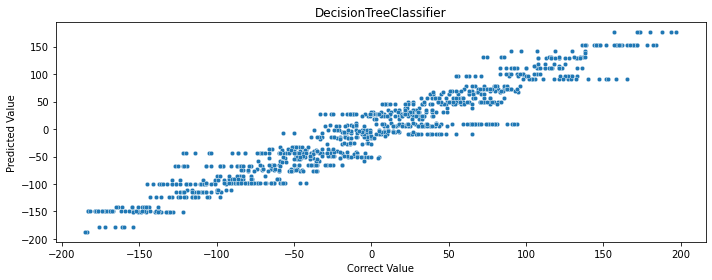

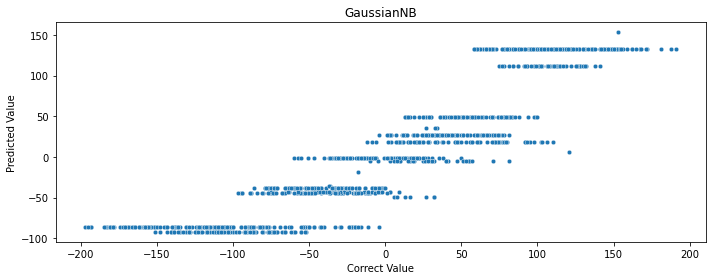

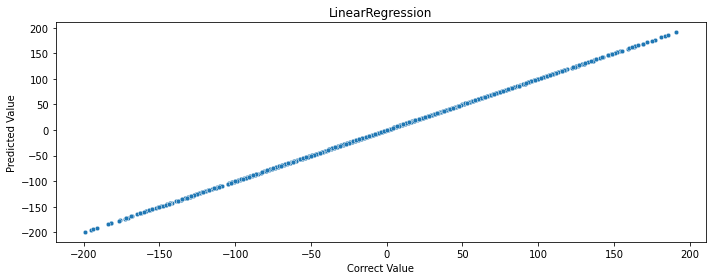

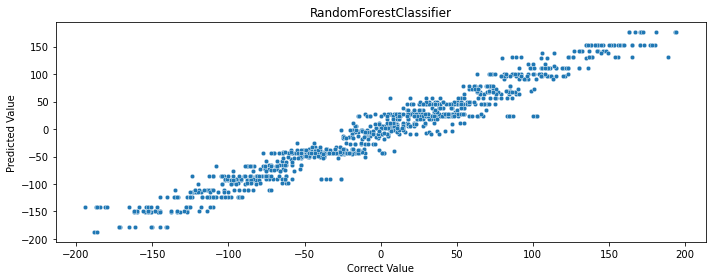

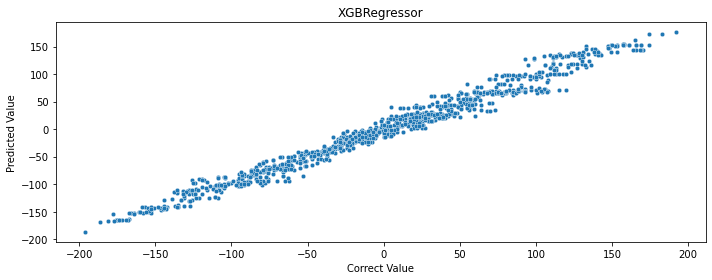

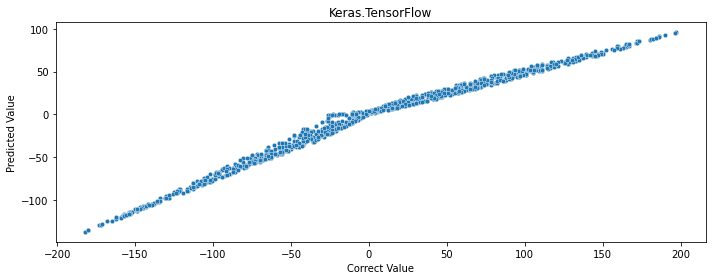

In [33]:
all_scatter_plots(0, list_of_models, 1000)

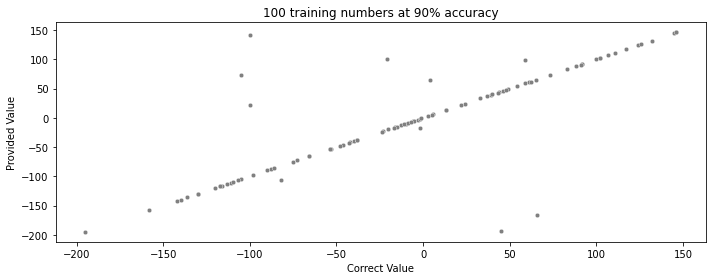

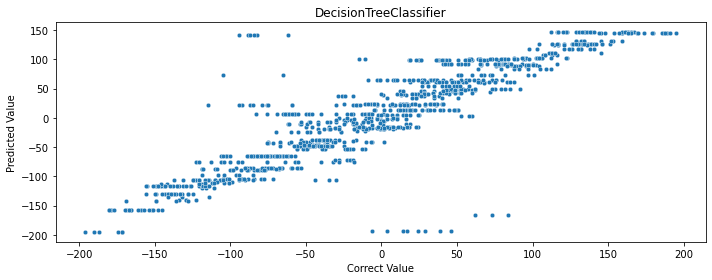

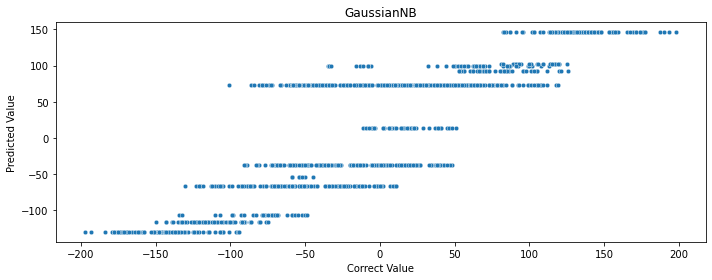

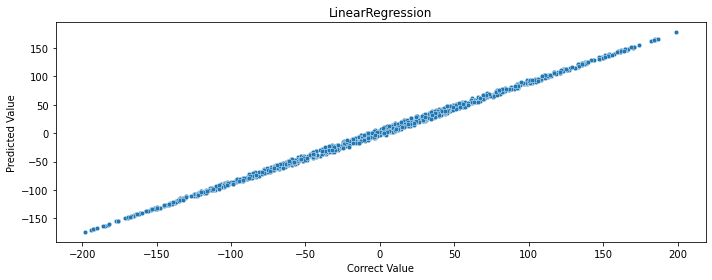

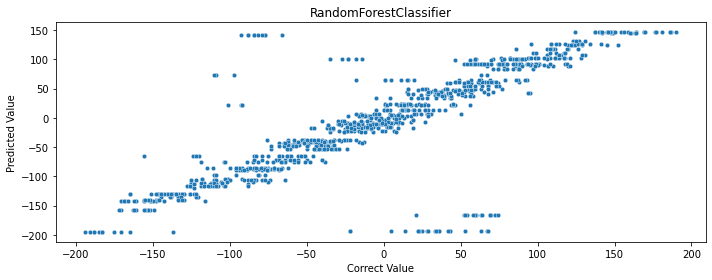

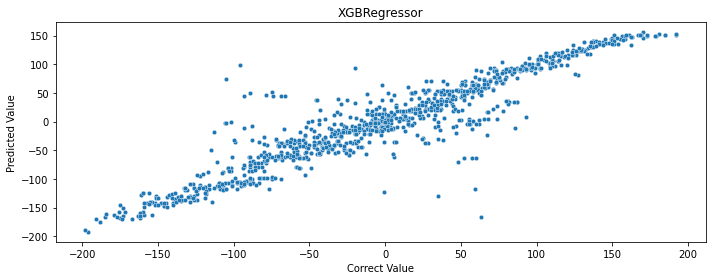

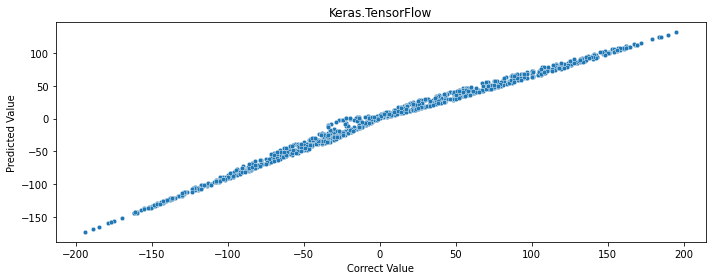

In [34]:
all_scatter_plots(2, list_of_models, 1000)

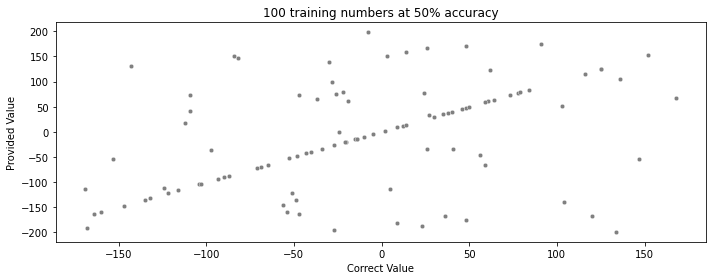

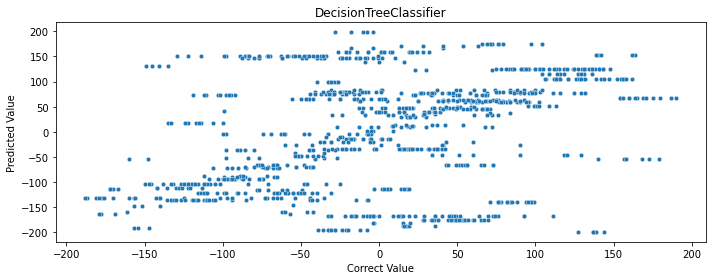

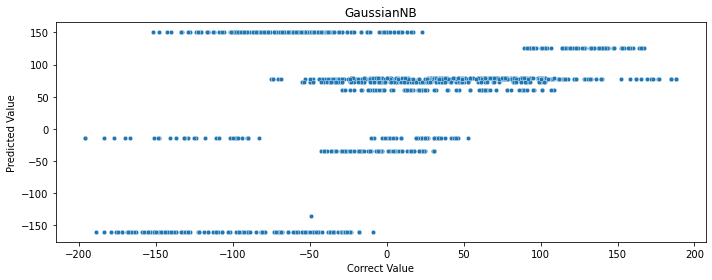

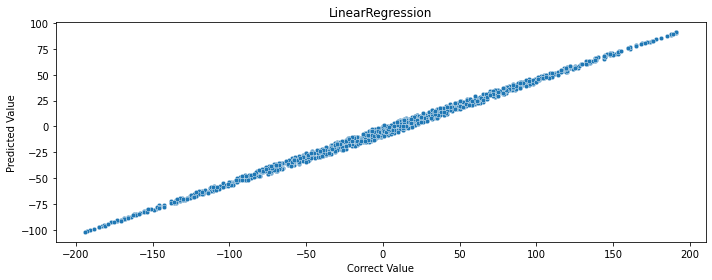

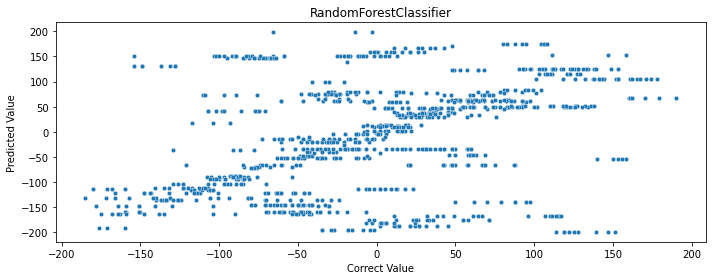

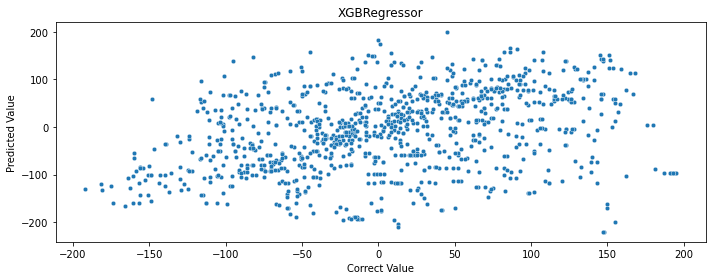

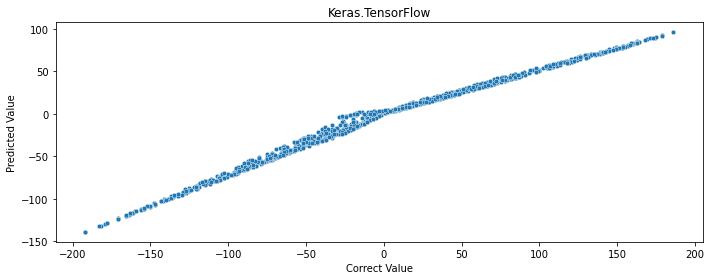

In [35]:
all_scatter_plots(4, list_of_models, 1000)

# Single Comparison Scatterplots 
(this is the clunkier old version of the scatterplot... could still be useful though.)

In [ ]:
def compare_scatter(trainingset_n, model_n, n_tests):
    current_training_set = training_sets[trainingset_n]
    print(current_training_set)

    current_train_model = list_of_models[model_n]
    print(get_name_of_model(current_train_model))

    num_tests = n_tests
    print(f"{num_tests} numbers to test")
    print()

    # training set plot
    training_set_to_plot = current_training_set
    scatterplot_accuracy(training_set_to_plot)
    plt.title(current_training_set)

    # test set plot
    current_test_model = train_model(current_train_model, current_training_set)
    set_to_plot = prediction_output(current_test_model, num_tests)
    scatterplot_accuracy(set_to_plot)
    
    plt.title(get_name_of_model(current_train_model))


### Compare Scatterplots of Predictions for 50% Accuracy

In [ ]:
compare_scatter(14, 0, 1000)

In [ ]:
compare_scatter(14, 1, 1000)

In [ ]:
compare_scatter(14, 2, 1000)

In [ ]:
compare_scatter(14, 3, 1000)

In [ ]:
compare_scatter(14, 4, 1000)

In [ ]:
compare_scatter(14, 5, 1000)

### Compare Scatterplots of Predictions for 90% Accuracy

In [ ]:
compare_scatter(12, 0, 1000)

In [ ]:
compare_scatter(12, 1, 1000)

In [ ]:
compare_scatter(12, 2, 1000)

In [ ]:
compare_scatter(12, 3, 1000)

In [ ]:
compare_scatter(12, 4, 1000)

In [ ]:
compare_scatter(12, 5, 1000)

### Compare Scatterplots of Predictions for 100% Accuracy

In [ ]:
compare_scatter(10, 0, 1000)

In [ ]:
compare_scatter(10, 1, 1000)

In [ ]:
compare_scatter(10, 2, 1000)

In [ ]:
compare_scatter(10, 3, 1000)

In [ ]:
compare_scatter(10, 4, 1000)

In [ ]:
compare_scatter(10, 5, 1000)

# Predictions Grid Visualisation

In [36]:
def prediction_grid(trainingset_n, model_n, grid_min, grid_max):
    '''
    plot of a grid with predictions
    '''

    current_training_set = training_sets[trainingset_n]
    print(current_training_set)

    current_train_model = list_of_models[model_n]
    print(get_name_of_model(current_train_model))

    # trained model to use for grid construction
    current_test_model = train_model(current_train_model, current_training_set)

    grid = []
    row = []

    for i in range(grid_min, grid_max + 1, 1):
        row = []
        for j in range(grid_min, grid_max + 1, 1):
            temp_prediction = predict_model(current_test_model, [[i, j]])
            try:
                row.append(temp_prediction[0][0])
            except:
                row.append(temp_prediction[0])
        grid.append(row)

    return grid

In [37]:
def heatmap_grid(prediction_grid):
    figsize=(11, 9)
    grid = pd.DataFrame(prediction_grid)
    plt.figure(figsize=figsize)
    
    plot = sns.heatmap(grid, cmap='Blues', annot=True, fmt='.0f', linewidths=.5, 
                       vmin=0, vmax=20);  # vmin and vmax need to be updated with pridiction grid
    plt.title('Add This Value')
    plt.ylabel('To This Value')
    plot.xaxis.tick_top()


### Grids of Predictions for Each Model at 50% Training Data Accuracy

In [ ]:
heatmap_grid(prediction_grid(14, 0, 0, 10))

10000 training numbers at 50% accuracy
GaussianNB


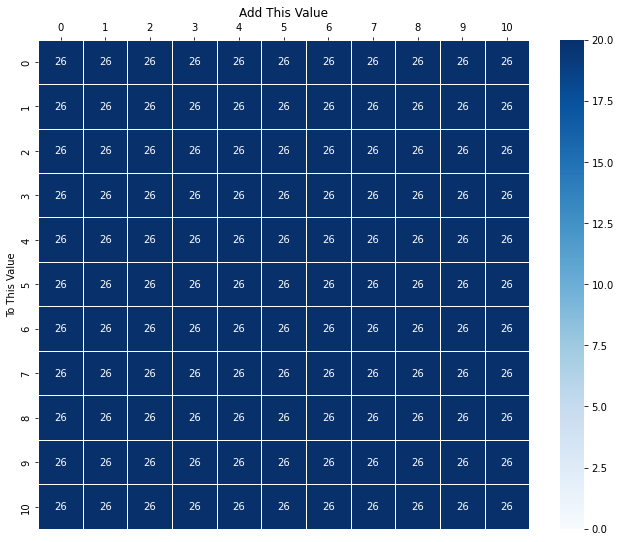

In [39]:
heatmap_grid(prediction_grid(14, 1, 0, 10))

10000 training numbers at 50% accuracy
LinearRegression


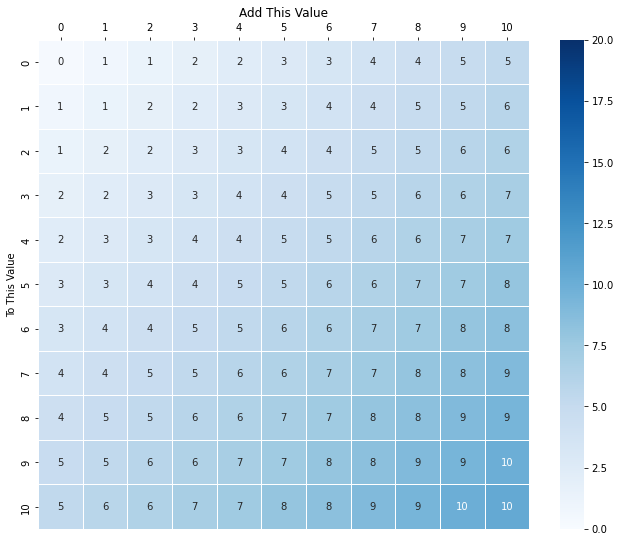

In [40]:
heatmap_grid(prediction_grid(14, 2, 0, 10))

10000 training numbers at 50% accuracy
RandomForestClassifier


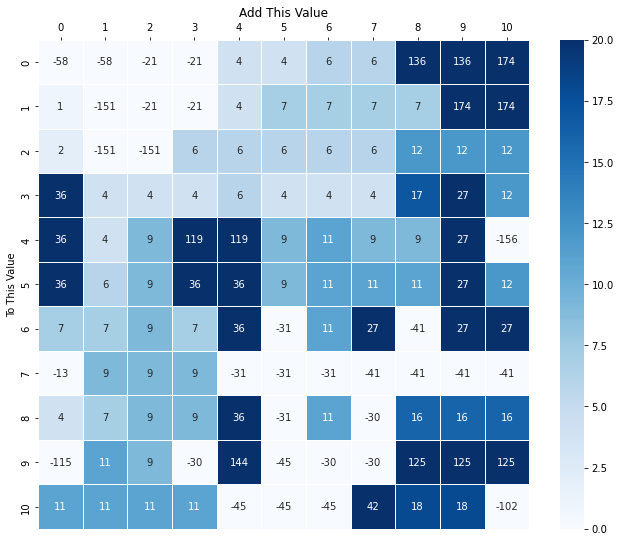

In [41]:
heatmap_grid(prediction_grid(14, 3, 0, 10))

10000 training numbers at 50% accuracy
XGBRegressor


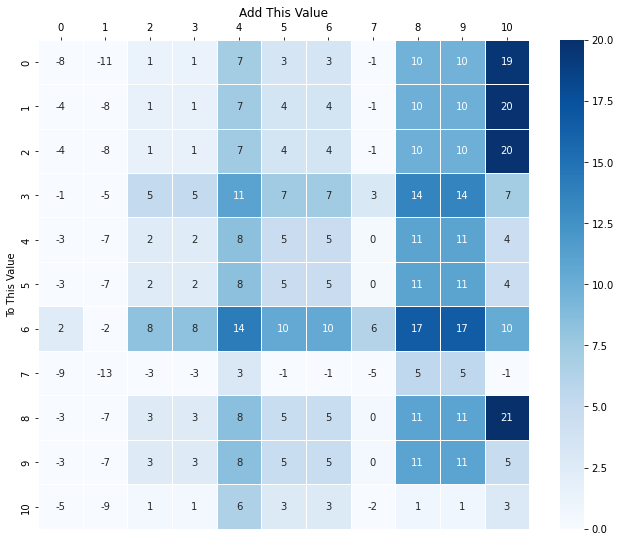

In [42]:
heatmap_grid(prediction_grid(14, 4, 0, 10))

10000 training numbers at 50% accuracy
Keras.TensorFlow


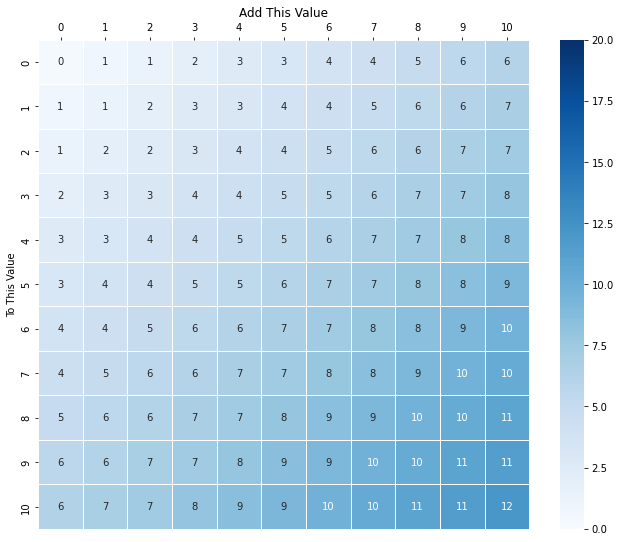

In [43]:
heatmap_grid(prediction_grid(14, 5, 0, 10))

### Grids of Predictions for Each Model at 90% Training Data Accuracy

10000 training numbers at 90% accuracy
DecisionTreeClassifier


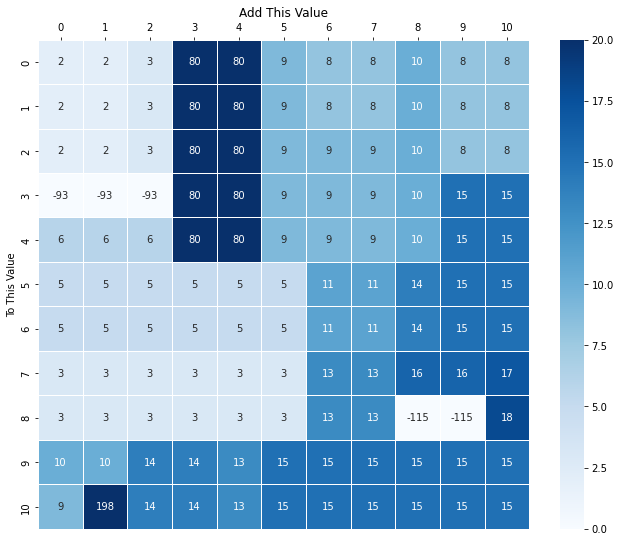

In [44]:
heatmap_grid(prediction_grid(12, 0, 0, 10))

10000 training numbers at 90% accuracy
GaussianNB


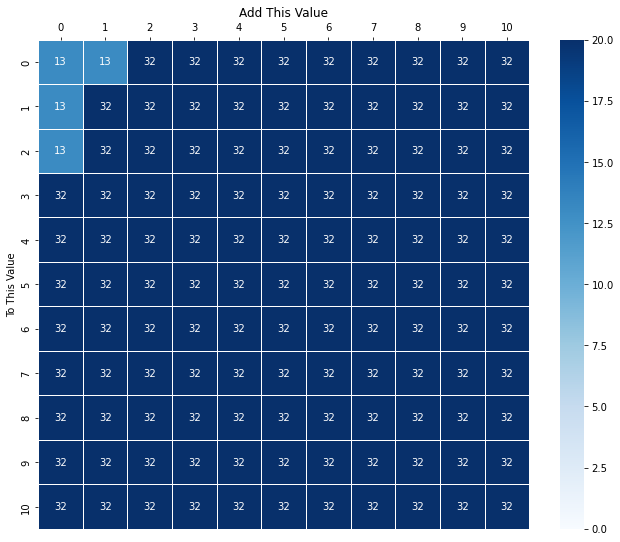

In [45]:
heatmap_grid(prediction_grid(12, 1, 0, 10))

10000 training numbers at 90% accuracy
LinearRegression


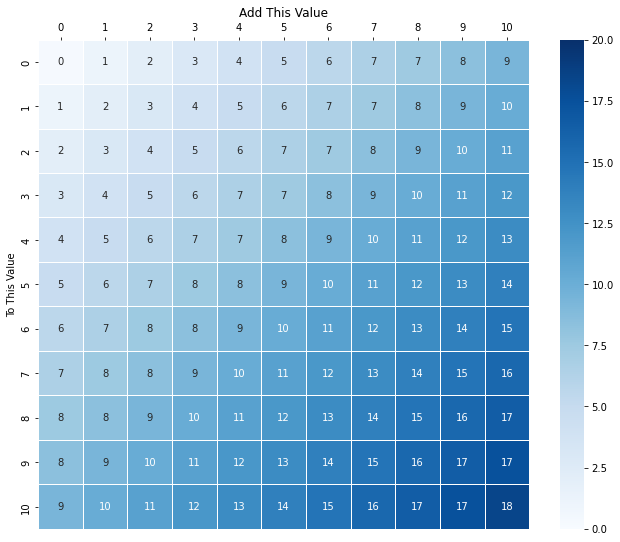

In [46]:
heatmap_grid(prediction_grid(12, 2, 0, 10))

10000 training numbers at 90% accuracy
RandomForestClassifier


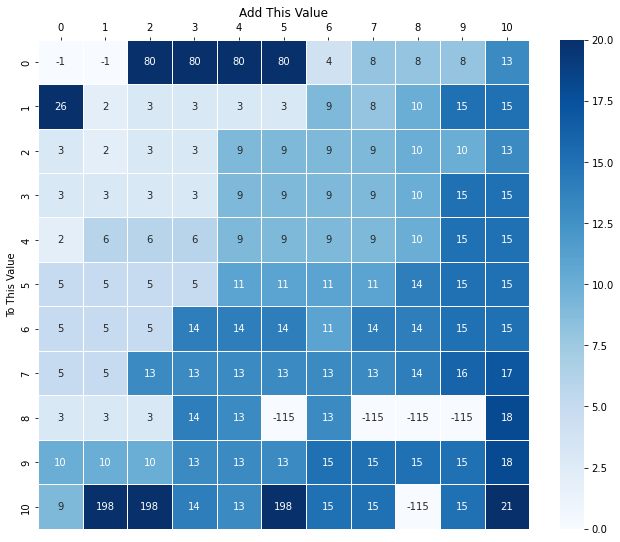

In [47]:
heatmap_grid(prediction_grid(12, 3, 0, 10))

10000 training numbers at 90% accuracy
XGBRegressor


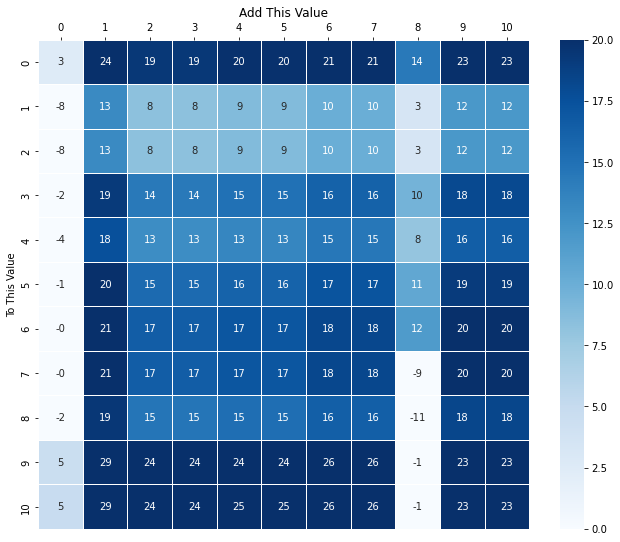

In [48]:
heatmap_grid(prediction_grid(12, 4, 0, 10))

10000 training numbers at 90% accuracy
Keras.TensorFlow


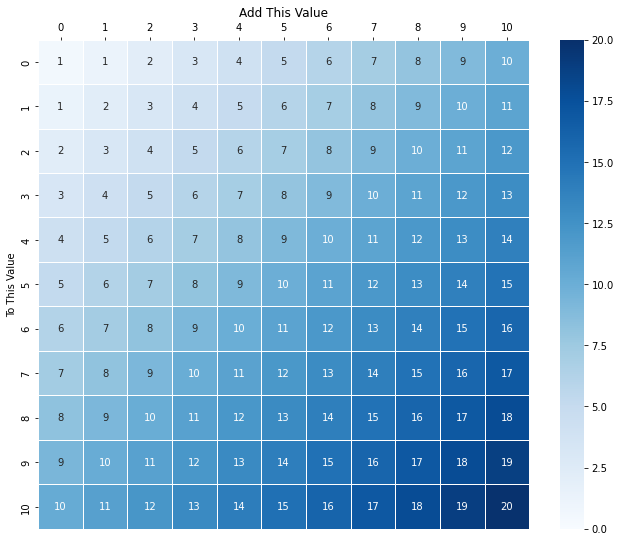

In [49]:
heatmap_grid(prediction_grid(12, 5, 0, 10))

### Grids of Predictions for Each Model at 100% Training Data Accuracy

10000 training numbers at 100% accuracy
DecisionTreeClassifier


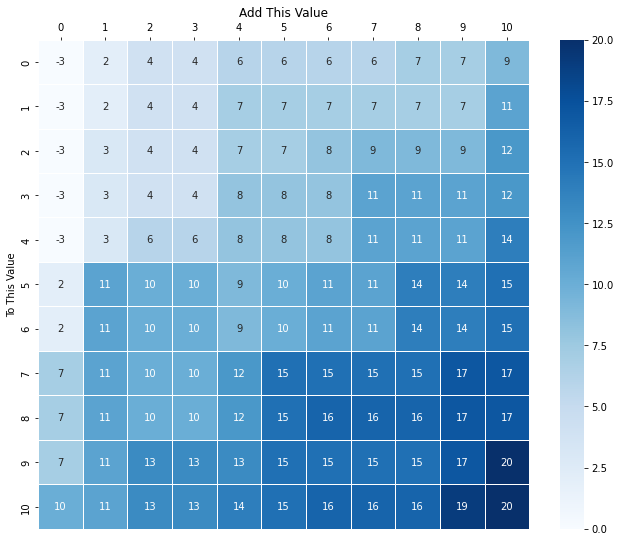

In [50]:
heatmap_grid(prediction_grid(10, 0, 0, 10))

10000 training numbers at 100% accuracy
GaussianNB


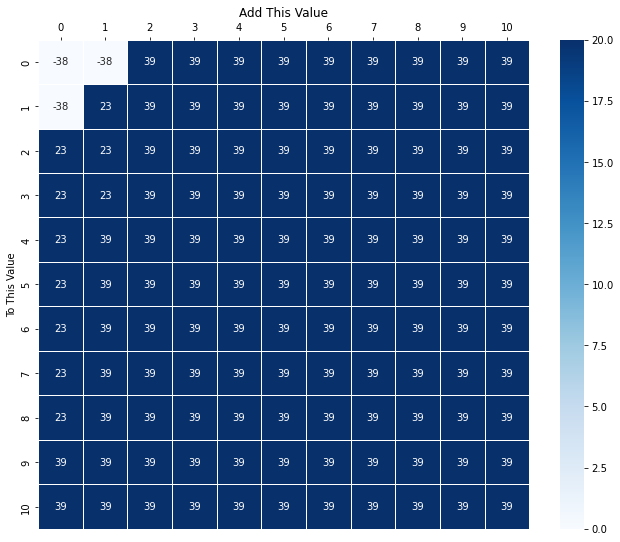

In [51]:
heatmap_grid(prediction_grid(10, 1, 0, 10))

10000 training numbers at 100% accuracy
LinearRegression


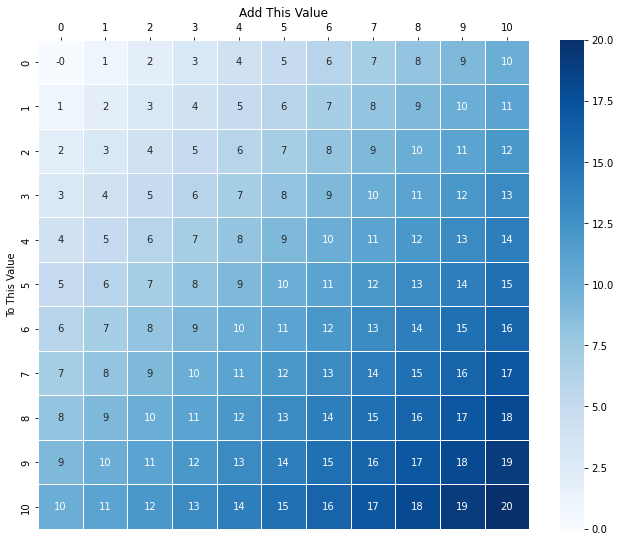

In [52]:
heatmap_grid(prediction_grid(10, 2, 0, 10))

10000 training numbers at 100% accuracy
RandomForestClassifier


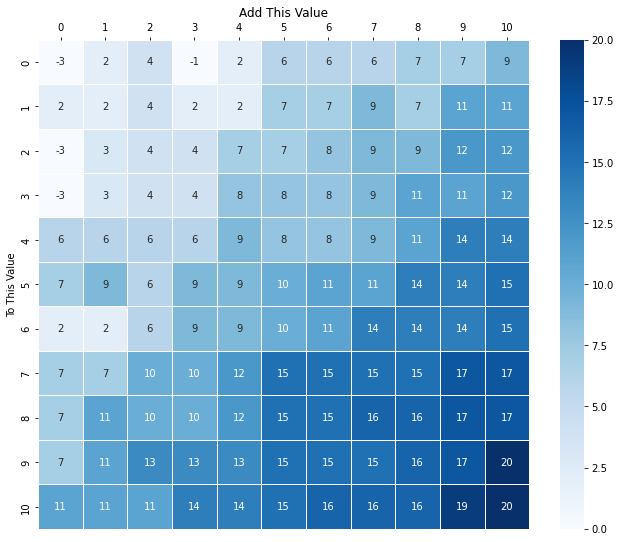

In [53]:
heatmap_grid(prediction_grid(10, 3, 0, 10))

10000 training numbers at 100% accuracy
XGBRegressor


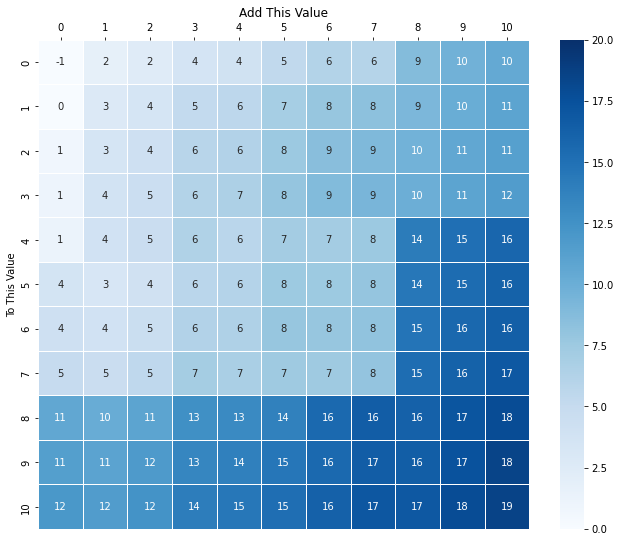

In [54]:
heatmap_grid(prediction_grid(10, 4, 0, 10))

10000 training numbers at 100% accuracy
Keras.TensorFlow


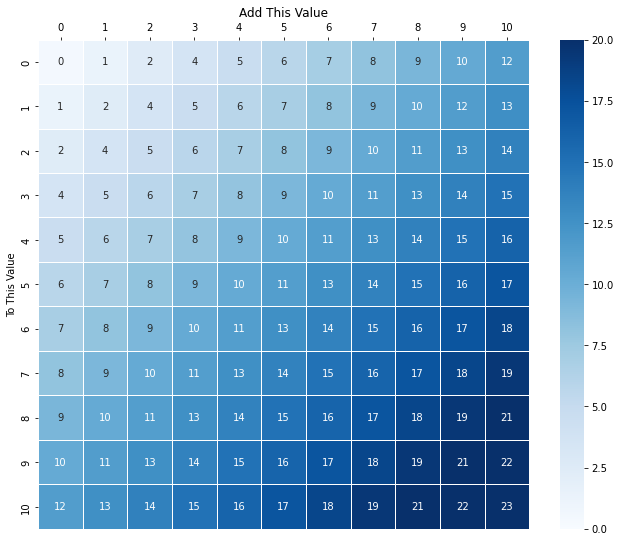

In [55]:
heatmap_grid(prediction_grid(10, 5, 0, 10))